# Spring 2025 

Feb 21, 2025, Villas-Boas

# Part 1: Intro to Notebooks




### Before we start going over this notebook I wrote, I will briefly explain how to open a blank notebook, instead of using one already made that you can execute and edit and add to

1. to run a cell of code, go to the cell and then click on the play triangle  icon top left before the square stop icon

or go to the cell and click shift+enter

2. To write a markdown cell not to be interpreted as Code go to the dropdorn on top where it says Code, to the right of download, and choose Markdown

3. To add a new cell click the plus sign between the save and the scissors

Please add a new cell below this one and select it to be a markdown cell. Then in it write "### start R preamble"

## You don't like the larger font of this cell. and want to change it to smaller font.

How do you do that?

double click on this cell, this will let you edit it.

Then remove the ## before You int he first line of text

Then shift + enter

It will execute the markdown

A # preceding text makes a the largest font size,
then ##, ###, etc


Note that the cell below is a markdown that has not been executed to look "nice" as a title.

Please execute it and make the title the largest font size

## Question 1 - Linear Demand Single Product, endogenous price

You notice that you want to bring the ### start R preamble markdown cell down here.

How do you do that?

Go on top of the cell and drag it down to where you want

In [ ]:
# Load the 'pacman' package
install.packages("pacman")
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, reader,AER,stargazer) 
#Another great feature of p_load(): 
#if you try to load a package that is not installed on your machine, p_load() 
#install the package for you, rather than throwing an error. 
#For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)

# Loading packages
pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse,psych)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots
# psych for using describe later onlibrary(dplyr)
#AER has canned ivreg, fyi


While a cell is running it has a * inside [ ] to its left, like so [*]

In [2]:
#get rid of scientific display of numbers
options(scipen = 100, digits = 4)

### Step 1: Load the .dta file and create a dataframe called mydata  

In [3]:
mydata <- read_dta("fishdata.dta")

### Step 2: Look at the data

you want to use the `head()` command so that R does not print the entire dataset which could take way too many pages.

In [4]:
#look at the first rows of the data frame you called mydata when you read the data set into R
head(mydata)

day1,day2,day3,day4,date,stormy,mixed,price,qty,rainy,cold,windspd,windspd2,pricelevel,totr,tots
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,911202,1,0,-0.43078,8.994,1,0,2.996,8.974,0.6500,7232,8058
0,1,0,0,911203,1,0,0.00000,7.707,0,0,2.996,8.974,1.0000,2110,2224
0,0,1,0,911204,0,1,0.07232,8.350,1,1,2.813,7.915,1.0750,5247,4231
0,0,0,1,911205,1,0,0.24714,8.657,0,1,3.037,9.221,1.2804,1290,5750
0,0,0,0,911206,1,0,0.66433,7.844,0,1,3.037,9.221,1.9432,1717,2551
1,0,0,0,911209,0,0,-0.20651,9.301,0,0,2.762,7.629,0.8134,11643,10977


### Step 3: Create a scatterplot of the data. 

Make sure to (1) label the axes and their
units, and (2) title your graph. (Hint: the `plot()` command will likely come in handy. Use `help(plot)` or `?plot` to view the documentation for the function and how to include labels.)

If you want to show students what they should get, before they add labels display an image you uploaded into datahub and called into the notebook by the markdown

<img src="graphNoLabels.png" width="250" />

Please execute and see

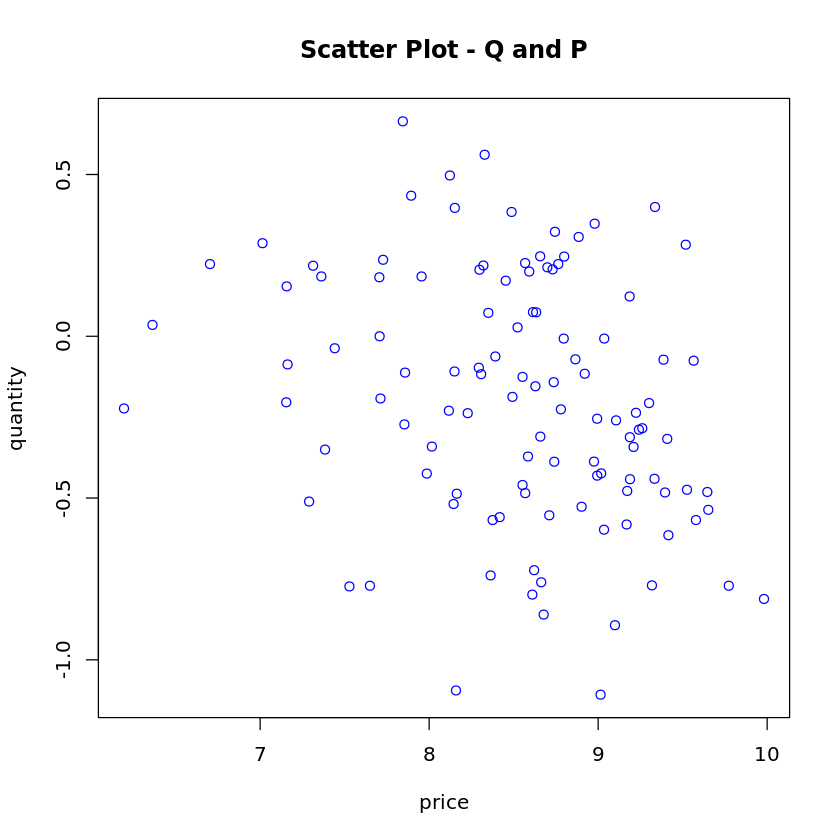

In [5]:
#scatter plot of the data
plot(mydata$qty, mydata$price,  col = "blue", main="Scatter Plot - Q and P",
   ylab="quantity",     xlab="price")



### Step 4- Estimate the JEP paper linear demand model by OLS

In [6]:
#estimate the model by OLS
#variable price is in logs variable qty is in logs 
#column 1 JEP paper
reg1 <- lm(qty ~ price, data = mydata)
summary(reg1)



Call:
lm(formula = qty ~ price, data = mydata)

Residuals:
   Min     1Q Median     3Q    Max 
-2.345 -0.357  0.119  0.498  1.253 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   8.4187     0.0762  110.45 <0.0000000000000002 ***
price        -0.5409     0.1786   -3.03              0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.716 on 109 degrees of freedom
Multiple R-squared:  0.0776,	Adjusted R-squared:  0.0691 
F-statistic: 9.17 on 1 and 109 DF,  p-value: 0.00308


### Step 5 - Estimate the model by IV 

Using storm conditions (indicator) at sea as an instrument for fish price int he market

In [7]:
#column 3 JEP paper
#Instrumental variables estimates using storm at sea as instrument for price of fish at the market
reg2<-ivreg(qty~price | stormy ,data=mydata)
summary(reg2)

#The elasticity of demand increased from -0.54 to -1.08 between column 1 
#and column 3, showing that elasticity of demand for fish actually 
#greater than 1, in absolute value, demand elasticity.

#test weak instru
regfirststage3<-lm(price~stormy,mydata)
summary(regfirststage3)
#F-statistic: 20.69 



Call:
ivreg(formula = qty ~ price | stormy, data = mydata)

Residuals:
   Min     1Q Median     3Q    Max 
-2.361 -0.500  0.207  0.551  1.511 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)    8.314      0.115   72.53 <0.0000000000000002 ***
price         -1.082      0.466   -2.32               0.022 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.745 on 109 degrees of freedom
Multiple R-Squared: -0.00019,	Adjusted R-squared: -0.00937 
Wald test:  5.4 on 1 and 109 DF,  p-value: 0.022 



Call:
lm(formula = price ~ stormy, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8181 -0.2243  0.0305  0.2091  0.8515 

Coefficients:
            Estimate Std. Error t value       Pr(>|t|)    
(Intercept)  -0.2903     0.0396   -7.34 0.000000000041 ***
stormy        0.3353     0.0737    4.55 0.000014077400 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.352 on 109 degrees of freedom
Multiple R-squared:  0.16,	Adjusted R-squared:  0.152 
F-statistic: 20.7 on 1 and 109 DF,  p-value: 0.0000141


### Make a nice Table with OLS and IV

In [8]:

#nice regression table, each specification in columns
stargazer(reg1,reg2,type="text")


                                       Dependent variable:        
                               -----------------------------------
                                               qty                
                                        OLS           instrumental
                                                        variable  
                                        (1)               (2)     
------------------------------------------------------------------
price                                -0.541***          -1.082**  
                                      (0.179)           (0.466)   
                                                                  
Constant                              8.419***          8.314***  
                                      (0.076)           (0.115)   
                                                                  
------------------------------------------------------------------
Observations                            111               111

# Part 2: Using Latex equations in markdown

In [9]:
p_load(foreach,evd,magrittr)

#the above packages are needed for looping and for extreme value random variable draws

### Simulate data - Micro level Logit estimation exogenous price

Simulate data from the following model and 
estimate the parameters from the simulated data.

$$
  y_{ij} = 1\{j = \text{argmax}_{k = 1, 2}  [ \alpha \ price_k+ \beta x_k + \epsilon_{ik} ] \},
$$
  where $\epsilon_{ik}$ follows i.i.d. type-I extreme value distribution, 
$\beta = 0.2$, $\alpha=-0.6$,  $x_1 = 0$ and $x_2 = 1$.

1. To simulate data for 1000 individuals i, first make the data frame defined above, including price and epsilon and then given the true alpha and beta get the latent values and the ultimate choices. set seed=1234


### Step 1 -Simulate Data

In [10]:
set.seed(1234)

df <- 
  expand.grid(  i = 1:1000,   k = 1:2) %>%
  tibble::as_tibble() %>%
  dplyr::mutate(x = ifelse(k == 1, 0, 1)) %>%
  dplyr::arrange(i,  k)

df <- 
  df %>%
  #First, add a random (exogenous) price
  dplyr::mutate(price = runif(dim(df)[1])) %>%
#Second, draw type-I extreme value random variables. 
  dplyr::mutate(e = evd::rgev(dim(df)[1]))

#3. compute the latent value of each option to obtain the following data frame:
beta <- 0.2
alpha<- -0.6
theta<-c(alpha,beta)
df <- 
  df %>%
  dplyr::mutate(latent = alpha*price+ beta * x + e)


#4. Finally, compute $y$ (the choices 0/1) by comparing the latent values of $k = 1, 2$ 
#for each $i$ to obtain the following result:
df <- 
  df %>%
  dplyr::group_by(i) %>%
  dplyr::mutate(y = ifelse(latent == max(latent), 1, 0)) %>%
  dplyr::ungroup()
head(df)




i,k,x,price,e,latent,y
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0.1137,-0.7942,-0.8624,0
1,2,1,0.6223,1.6189,1.4455,1
2,1,0,0.6093,-1.0256,-1.3911,0
2,2,1,0.6234,0.6579,0.4839,1
3,1,0,0.8609,-0.1326,-0.6492,1
3,2,1,0.6403,-1.3958,-1.5800,0



## Estimate the ML parameters

Now you generated simulated data. Suppose you observe $x_k$ and $y_{ik}$ for 
#each $i$ and $k$ and estimate $\beta$ by a maximum likelihood estimator. 
#The likelihood for $i$ to choose $k$ ($y_{ik} = 1$) can be shown to be:

 $$
 p_{ik}(\beta) = \frac{\exp(\alpha p_k + \beta x_k)}{\exp(\alpha p_1 + \beta x_1) + \exp(alpha p_2+ \beta x_2)}. $$
  
 Then, the likelihood of observing $\{y_{ik}\}_{i, k}$ is:  $$
  L(\beta) = \prod_{i = 1}^{1000} p_{i1}(\beta)^{y_{i1}} [1 - p_{i1}(\beta)]^{1 - y_{i1}},
$$
  and the log likelihood is:
 $$
  l(\beta) = \sum_{i = 1}^{1000}\{y_{i1}\log p_{i1}(\beta) + (1 - y_{i1})\log [1 - p_{i1}(\beta)\}.
$$
 

In [11]:
 
#  5. Write a function to compute the likelihood for a given $\beta$ and 
#data and name the function `loglikelihood_a1`. 

 loglikelihood_quest2 <-function( temp, df ) 
   {
      l <-  df %>%
      dplyr::group_by(i) %>%
       dplyr::mutate(p = exp(temp[1]*price+temp[2]*x)/sum(exp(temp[1]*price+temp[2]*x))) %>%
       dplyr::ungroup() %>%
      dplyr::filter(y == 1)
     l <- mean(log(l$p))
     return(l)
    }


 
 ltry<- loglikelihood_quest2( c(alpha,0.3),  df )


In [12]:
ltry


[1] -0.6876

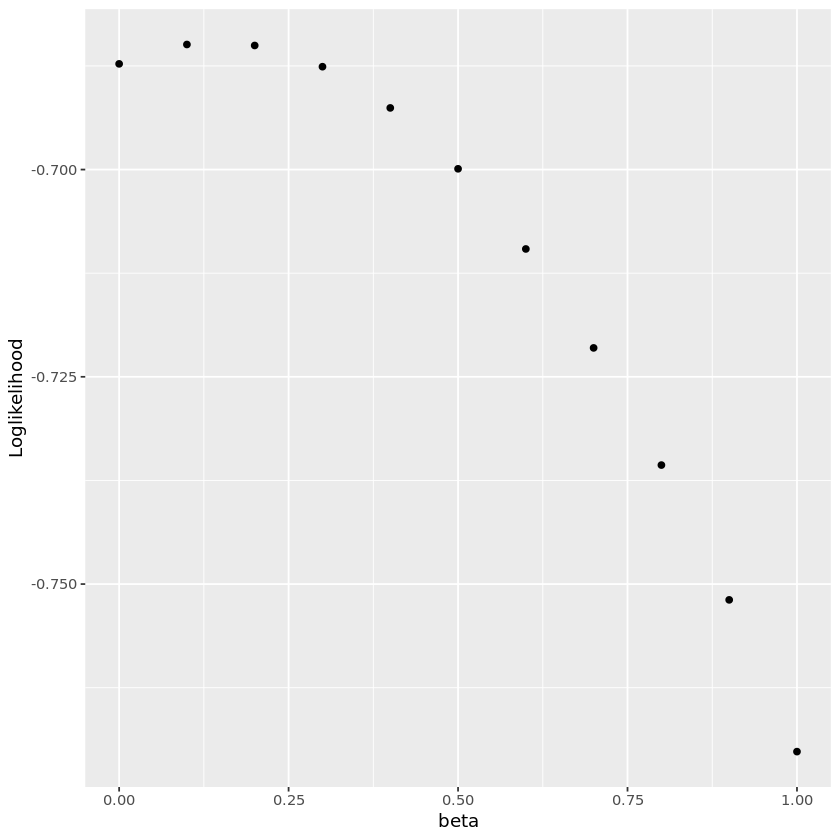

In [13]:

# 6. Compute the value of log likelihood for $\beta = 0, 0.1, \cdots, 1$ and at true alpha, 
 #and plot the result using `ggplot2` packages. 

b_seq <- seq(0, 1, 0.1)
output <- 
  foreach (
    b = b_seq,
    .combine = "rbind"
  ) %do% {
    l <- 
      loglikelihood_quest2(c(alpha,b), df)
    return(l)
  }

output <- 
  data.frame(x = b_seq, y = output )
output %>%
  ggplot( aes( x = x, y = y) ) +
  geom_point() + 
  xlab(("beta")) + 
  ylab("Loglikelihood")




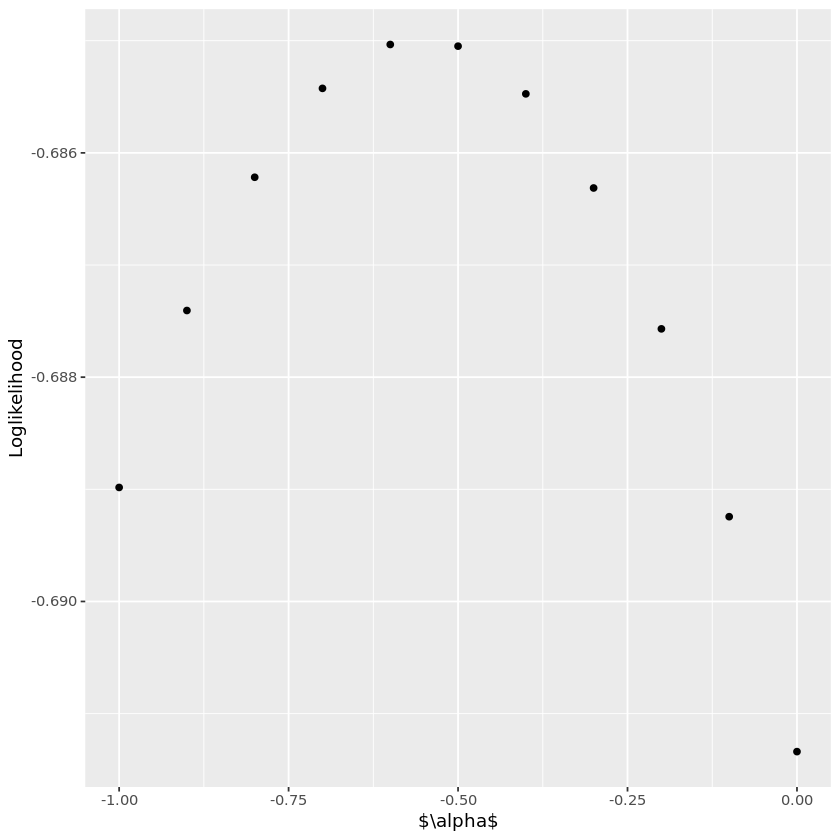

In [14]:
#7. do the same but now for true beta=0.2 for a range of alpha -1 to 0
#and plot the result using `ggplot2` packages. 

a_seq <- seq(-1, 0, 0.1)
output <- 
  foreach ( a = a_seq, .combine = "rbind") %do% {
    l <- 
      loglikelihood_quest2(c(a,beta), df)
    return(l)
  }

output <- 
  data.frame(x = a_seq, y = output )
output %>%
  ggplot( aes( x = x, y = y) ) + geom_point() +  xlab(("$\\alpha$")) +  ylab("Loglikelihood")



In [15]:
#8. Find and report $\alpha$ and $\beta$ that maximizes the log likelihood for the simulated data.

result <- 
  optim( par = theta, fn = loglikelihood_quest2,df = df, control = list(fnscale = - 1))
result



$par
[1] -0.5469  0.1439

$value
[1] -0.6846

$counts
function gradient 
      33       NA 

$convergence
[1] 0

$message
NULL

### Recall that $\alpha=-0.6$ and $\beta = 0.2$

## Part 3 - Simulate data - Micro level Logit estimation endogenous price

Simulate data from the following model and 
#estimate the parameters from the simulated data, adding an endogenous priceE

Let $priceE$ be the price in the data, where it is a linear function of $price$ (exogenous factors that could affect priceE),  $x$ indicators for the two alternatives, $Xe$ that also affectes choices, and the residual determinants of price that we assume to be uniform. 

Consider, therefore,  the following new choice model: 

 $y_{ij} = 1 \{ j = arg \max\limits_{k = 1, 2} \left[  \alpha \ priceE_{ik}+ \beta x_{ik} +\xi_{ik}+  \epsilon_{ik} \right] \ \}$
where $\epsilon_{ik}$ follows i.i.d. type-I extreme value distribution, 
  $x_1 = 0$ and $x_2 = 1$ and now the  $priceE_{ik}=p_{ik}+x_{ik}+\xi_{ik}+v_{ik}$

where, as before, $p_{ik}$ follows a random uniform distribution between 0 and 1, the residuals  $v_{ik}$ of the $priceE_{ik}$ equation  are also random uniform distribution between 0 and 1. The endogeneity problem are the $xi_{ik}$.



In [16]:

set.seed(1234)
#1.1 define an omitted variable Xe (the Xis in logit demand)
#define the model of priceE with Xe
df <- 
  df %>%
  dplyr::mutate(Xe = runif(dim(df)[1]))  %>%
  dplyr::mutate(priceE = price +Xe+runif(dim(df)[1]))


beta <- 0.2
alpha<- -0.6
theta<-c(alpha,beta)
df <- 
  df %>%
  dplyr::mutate(latent2 = alpha*priceE+ beta * x +Xe+ e)



#2. Compute $y2$ by comparing the latent2 values of $k = 1, 2$ 
#for each $i$ to obtain the following result:
df <- 
  df %>%
  dplyr::group_by(i) %>%
  dplyr::mutate(y2 = ifelse(latent2 == max(latent2), 1, 0)) %>%
  dplyr::ungroup()
head(df)


i,k,x,price,e,latent,y,Xe,priceE,latent2,y2
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0.1137,-0.7942,-0.8624,0,0.1137,0.3414,-0.8854,0
1,2,1,0.6223,1.6189,1.4455,1,0.6223,1.4368,1.5791,1
2,1,0,0.6093,-1.0256,-1.3911,0,0.6093,1.8370,-1.5185,0
2,2,1,0.6234,0.6579,0.4839,1,0.6234,1.8458,0.3738,1
3,1,0,0.8609,-0.1326,-0.6492,1,0.8609,1.7837,-0.3419,1
3,2,1,0.6403,-1.3958,-1.5800,0,0.6403,1.9799,-1.7435,0


### Estimate $\alpha$ and $\beta$ by Max Likelihood

In [17]:

#3.1 write the new loglikelihood function


loglikelihood_E <-function( temp, df ) 
{
  lE <-  df %>%
    dplyr::group_by(i) %>%
    dplyr::mutate(p2 = exp(temp[1]*priceE+temp[2]*x)/sum(exp(temp[1]*priceE+temp[2]*x))) %>%
    dplyr::ungroup() %>%
    dplyr::filter(y2 == 1)
  lE <- mean(log(lE$p2))
  return(lE)
}






In [18]:

#estimate the log likelihood 

#tempparam<-c(1,1)
resultE <- 
  optim( par = theta, fn = loglikelihood_E, df = df, control = list(fnscale = - 1))
resultE

$par
[1] -0.1919  0.1691

$value
[1] -0.6859

$counts
function gradient 
      47       NA 

$convergence
[1] 0

$message
NULL

### can you explain the OVB you see?

In [19]:

#4. #suppose you get data also for $price$. , then
#investigate the first stage and get first stage residuals and add to data frame

reg_firstStage<-lm(priceE~x+price-1,df)
summary(reg_firstStage)
#add first stage residuals to dataframe
df <- 
  df %>%
  dplyr::mutate(eFS=reg_firstStage$residuals)






Call:
lm(formula = priceE ~ x + price - 1, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-0.761 -0.162  0.119  0.366  0.996 

Coefficients:
      Estimate Std. Error t value            Pr(>|t|)    
x       0.1942     0.0148    13.1 <0.0000000000000002 ***
price   2.6126     0.0182   143.2 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.367 on 1998 degrees of freedom
Multiple R-squared:  0.949,	Adjusted R-squared:  0.949 
F-statistic: 1.87e+04 on 2 and 1998 DF,  p-value: <0.0000000000000002


### Estimate $\alpha$ and $\beta$ by ML using the control function method

exogenous portion of priceE , Z=price, as instrument for priceE and using the control function method

In [21]:

#5. Estimate alpha and beta by ML using the exogenous portion of priceE , Z=price, as
#instrument for priceE and using the control function method

#5.1 write the new loglikelihood function with control function


loglikelihood_cf <-function( temp, df ) {
  lcf <-  df %>%
    dplyr::group_by(i) %>%
    dplyr::mutate(pcf = exp(temp[1]*priceE+temp[2]*x+temp[3]*eFS)/sum(exp(temp[1]*priceE+temp[2]*x)+temp[3]*eFS)) %>%
    dplyr::ungroup() %>%
    dplyr::filter(y2 == 1)
  lcf <- mean(log(lcf$pcf))
  return(lcf) }



In [ ]:
#estimate the log likelihood 

tempparam<-c(theta,0.2)
result_cf <- 
  optim( par = tempparam, fn = loglikelihood_cf,df = df, control = list(fnscale = - 1))
result_cf


### You should get 
$\hat{\alpha}=-0.540274830578961$ $\hat{\beta}=0.363397566736415$ $\hat{\beta}_{residCF}=-0.764206922799313$

## The end